In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [2]:
# Define fuzzy input variables
distance = ctrl.Antecedent(np.arange(0, 101, 1), 'distance')  # 0 to 100 meters
speed = ctrl.Antecedent(np.arange(0, 121, 1), 'speed')        # 0 to 120 km/h
road = ctrl.Antecedent(np.arange(0, 3, 1), 'road')            # 0: Slippery, 1: Normal, 2: Rough

In [3]:
# Define fuzzy output variables
acceleration = ctrl.Consequent(np.arange(0, 11, 1), 'acceleration')  # 0 to 10 units
brake = ctrl.Consequent(np.arange(0, 101, 1), 'brake')              # 0 to 100% pressure

In [4]:
# Distance
distance['close'] = fuzz.trimf(distance.universe, [0, 0, 40])
distance['medium'] = fuzz.trimf(distance.universe, [20, 50, 80])
distance['far'] = fuzz.trimf(distance.universe, [60, 100, 100])

# Speed
speed['slow'] = fuzz.trimf(speed.universe, [0, 0, 50])
speed['normal'] = fuzz.trimf(speed.universe, [30, 60, 90])
speed['fast'] = fuzz.trimf(speed.universe, [70, 120, 120])

# Road Condition (Discrete - categorical)
road['slippery'] = fuzz.trimf(road.universe, [0, 0, 0])
road['normal'] = fuzz.trimf(road.universe, [1, 1, 1])
road['rough'] = fuzz.trimf(road.universe, [2, 2, 2])


In [5]:
# Acceleration
acceleration['decrease'] = fuzz.trimf(acceleration.universe, [0, 0, 4])
acceleration['maintain'] = fuzz.trimf(acceleration.universe, [3, 5, 7])
acceleration['increase'] = fuzz.trimf(acceleration.universe, [6, 10, 10])

# Brake
brake['low'] = fuzz.trimf(brake.universe, [0, 0, 40])
brake['medium'] = fuzz.trimf(brake.universe, [30, 50, 70])
brake['high'] = fuzz.trimf(brake.universe, [60, 100, 100])

In [6]:
rule1 = ctrl.Rule(distance['close'] & speed['fast'], 
                  consequent=[acceleration['decrease'], brake['high']])

rule2 = ctrl.Rule(road['slippery'], 
                  consequent=[acceleration['decrease'], brake['medium']])

In [7]:
speed_ctrl = ctrl.ControlSystem([rule1, rule2])
speed_simulation = ctrl.ControlSystemSimulation(speed_ctrl)

In [8]:
# Set input values
speed_simulation.input['distance'] = 20
speed_simulation.input['speed'] = 100
speed_simulation.input['road'] = 0  # Slippery

# Compute
speed_simulation.compute()

print(f"Recommended Acceleration: {speed_simulation.output['acceleration']:.2f}")
print(f"Recommended Brake Pressure: {speed_simulation.output['brake']:.2f}")

Recommended Acceleration: 1.33
Recommended Brake Pressure: 64.74


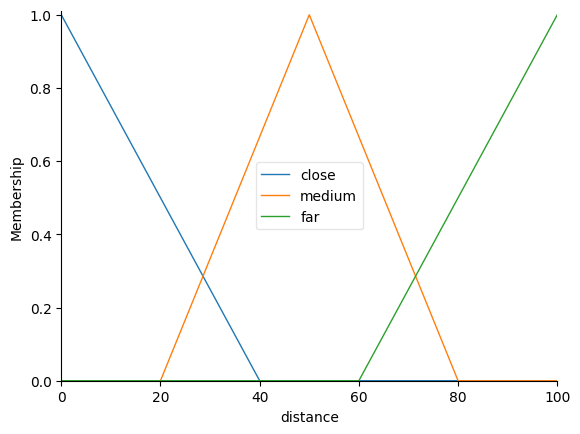

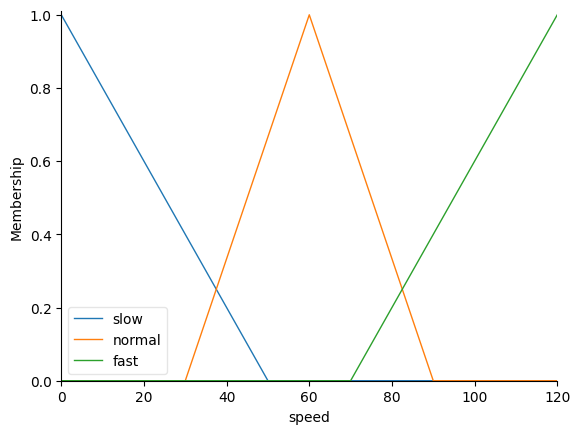

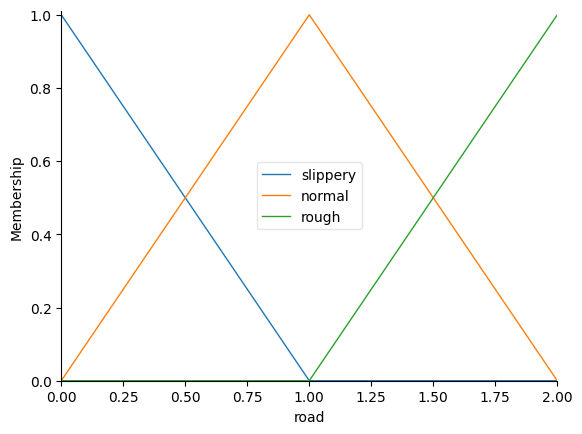

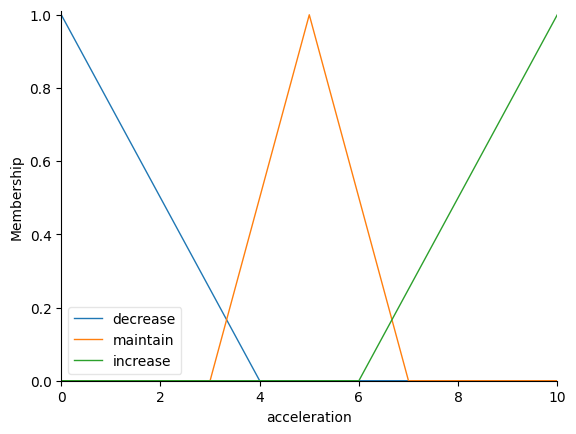

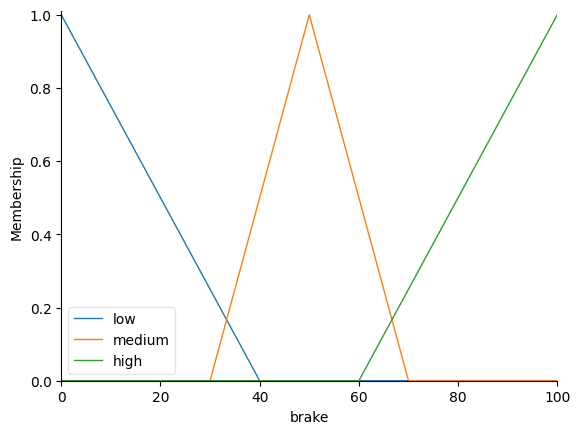

In [10]:
distance.view()
speed.view()
road.view()
acceleration.view()
brake.view()
plt.show()